In [1]:
import numpy as np  # imported numpy it is strong library of python for numerical computing, we can perform mathematical operations on multi dimensional arrays.
import pandas as pd   # imported pandas , it is strong libraryy for data manipulating and analysis , it is commanly used for data cleaning,transformation and analysis.
import seaborn as sns  #it is python visualization library based on matplotlib, it provides interface for drawing attractive and informative statistical graph. 

from sklearn.cluster import KMeans # imported KMeans from sklearn library of python, it is used for large dataset and it is only used when the data is unsupervised.

import matplotlib.pyplot as plt # it is core component of matplotlib library which is versatile plotting tool in python,pyplot provide a MATLAB-like interface for creating a variety of plots, it is used for analysis and visualization tasks.
import warnings    #  we import warnings module to manage warnings generated during programing.
warnings.filterwarnings('ignore')   # here we filtering all the warnings and ignoreing it.

In [2]:
'''This data set is about war survival either the person will die or survived 
    This is unsupervised data so it means first we have to change this dataset, from unsupervised to supervise data
    After that we get that the model is categorical type, so for that we want classification models
    WE have to first train our model and then find the accuracy of that model
    In this data the target column is survived which is not given.
    After using all model we will visualize our dataset.
    We also have to chnage all object type data into float type it means preprocessing part.'''

'This data set is about war survival either the person will die or survived \n    This is unsupervised data so it means first we have to change this dataset, from unsupervised to supervise data\n    After that we get that the model is categorical type, so for that we want classification models\n    WE have to first train our model and then find the accuracy of that model\n    In this data the target column is survived which is not given.\n    After using all model we will visualize our dataset.\n    We also have to chnage all object type data into float type it means preprocessing part.'

In [3]:
df=pd.read_csv("war_survival_data.csv")   #pd.read_csv is a function in the pandas library used to read a comma-seprated values(CSV)
df                                        #printing dataset

,Name,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available
0,Sophia,43,13,4.150040,4,10,21,21,5,2,15,No,Yes,Books
1,Emma,35,10,3.127285,10,16,8,30,7,3,12,No,Yes,Games
2,Sophia,30,14,3.529119,4,13,23,76,8,3,11,Yes,No,Books
3,James,53,16,4.840361,10,14,10,60,4,2,16,No,No,Games
4,Michael,27,3,4.845704,4,15,31,89,0,2,14,Yes,Yes,Books
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Michael,34,20,3.131152,10,7,48,93,5,3,2,Yes,Yes,Games
996,William,42,3,3.797801,0,3,32,36,8,3,13,Yes,No,Games
997,Jane,22,13,2.968983,6,1,5,21,10,1,6,No,Yes,Books
998,Michael,32,15,4.455705,5,8,5,12,10,4,11,No,Yes,Games


In [4]:
df.info()         #there are total 1000 rows and 14 columns
                  # name,access to Reliable Information, Support Groups Available,Entertainment Available are the object type values
                  # water per day is in float type values
                  # Rest all of them are integer type values
                # there ar no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            1000 non-null   object 
 1   Age                             1000 non-null   int64  
 2   Food Supply (Days)              1000 non-null   int64  
 3   Water per Day (Liters)          1000 non-null   float64
 4   First Aid Kits                  1000 non-null   int64  
 5   Antibiotics                     1000 non-null   int64  
 6   Painkillers                     1000 non-null   int64  
 7   Weapons Available               1000 non-null   int64  
 8   Defensive Structures            1000 non-null   int64  
 9   Training Level                  1000 non-null   int64  
 10  Radios Available                1000 non-null   int64  
 11  Access to Reliable Information  1000 non-null   object 
 12  Support Groups Available        100

In [5]:
df.describe()   # all the colums are nearly positively skewed

,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,38.489000,14.692000,3.039983,5.154000,9.612000,25.105000,47.564000,5.069000,2.430000,10.08500
std,12.241394,8.968588,1.119788,3.217551,6.071929,14.832261,28.792654,3.157247,1.719901,6.25579
min,18.000000,0.000000,1.015703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,28.000000,7.000000,2.050631,2.000000,4.000000,12.000000,22.000000,2.000000,1.000000,4.00000
50%,38.000000,15.000000,3.102646,5.000000,9.000000,25.000000,48.000000,5.000000,2.000000,10.00000
75%,49.000000,22.000000,3.951179,8.000000,15.000000,38.000000,73.000000,8.000000,4.000000,16.00000
max,60.000000,30.000000,4.995550,10.000000,20.000000,50.000000,100.000000,10.000000,5.000000,20.00000


In [6]:
new_df=df  # new_df is new variable where we assign our old df(dataset)

In [7]:
from sklearn.preprocessing import OrdinalEncoder  # imported OrdinalEncoder, it is used to transform categorical data into numerical data
oe=OrdinalEncoder() # oe is the varibale name for OrdinalEncoder 
new_df[["Name","Access to Reliable Information","Support Groups Available","Entertainment Available"]]=oe.fit_transform(new_df[["Name","Access to Reliable Information","Support Groups Available","Entertainment Available"]])
# here name & other columns have categorical type data so we transform the data into  numeric type 
# fit_transform is combined functionalities of fit and transform method.
# fit has learn unique categories and assigns an integer to each category
# after fitting,the transform methods applies the learned parameters to the data,converting it into the desired numerical values.

In [8]:
new_df.info()  #  here now we can see all the object type data are converted into float type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            1000 non-null   float64
 1   Age                             1000 non-null   int64  
 2   Food Supply (Days)              1000 non-null   int64  
 3   Water per Day (Liters)          1000 non-null   float64
 4   First Aid Kits                  1000 non-null   int64  
 5   Antibiotics                     1000 non-null   int64  
 6   Painkillers                     1000 non-null   int64  
 7   Weapons Available               1000 non-null   int64  
 8   Defensive Structures            1000 non-null   int64  
 9   Training Level                  1000 non-null   int64  
 10  Radios Available                1000 non-null   int64  
 11  Access to Reliable Information  1000 non-null   float64
 12  Support Groups Available        100

In [9]:
from sklearn.preprocessing import StandardScaler # imported StandardScaler, it is basically a preprocessing part it transform data into mean=0 & standard deviation=1

In [10]:
for col in new_df: # this is the loop that iterates over the columns of the DataFrame(new_df)
    ss=StandardScaler()    # ss is variable of StandarScaler  
    new_df[col]=ss.fit_transform(new_df[[col]])    # this line fits the transform data in a specific columnof the dataframe and then transform that data, updating the dataframe into tranform dataset

In [11]:
new_df  # printing new_df

,Name,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available
0,1.088191,0.368688,-0.188753,0.991806,-0.358837,0.063933,-0.276900,-0.923058,-0.021865,-0.250140,0.786065,-0.970437,0.982159,-1.002002
1,-1.546655,-0.285159,-0.523421,0.078002,1.506868,1.052581,-1.153806,-0.610322,0.611915,0.331580,0.306270,-0.970437,0.982159,0.998002
2,1.088191,-0.693814,-0.077197,0.437030,-0.358837,0.558257,-0.141991,0.988107,0.928805,0.331580,0.146338,1.030464,-1.018165,-1.002002
3,-1.107514,1.185997,0.145915,1.608589,1.506868,0.723031,-1.018898,0.432132,-0.338756,-0.250140,0.945997,-0.970437,-1.018165,0.998002
4,0.209909,-0.939007,-1.304313,1.613363,-0.358837,0.887806,0.397643,1.439837,-1.606316,-0.250140,0.626133,1.030464,0.982159,-1.002002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.209909,-0.366890,0.592140,0.081457,1.506868,-0.430392,1.544367,1.578831,-0.021865,0.331580,-1.293049,1.030464,0.982159,0.998002
996,1.527332,0.286957,-1.304313,0.677089,-1.602641,-1.089490,0.465098,-0.401831,0.928805,0.331580,0.466201,1.030464,-1.018165,0.998002
997,-0.668373,-1.347661,-0.188753,-0.063437,0.263064,-1.419040,-1.356169,-0.923058,1.562585,-0.831859,-0.653322,-0.970437,0.982159,-1.002002
998,0.209909,-0.530352,0.034359,1.264910,-0.047886,-0.265617,-1.356169,-1.235794,1.562585,0.913300,0.146338,-0.970437,0.982159,0.998002


In [12]:
wcss=[]                                  # finding intra distance it is used measure the total squared distance between each point in the cluster and the centroid of that cluster
clusters=list(range(1,9))                 # cluster list range is between 1,9 set
for k in clusters:                        # this is loop that iterates k in clusters
    model=KMeans(n_clusters=k) # KMeans is the class provided by sklearn to perform kmeans clustering....n_clusters=k this parameter specifies number of centroids to generate the variable k represneds the number of cluster
    model.fit(new_df)   # is a part of process of training a k-means clustering model using a dataset stored in new_df.
    wcss.append(model.inertia_)   # this helps in determining the optimal number of clusters using the elbow method.

In [13]:
wcss    # print wcss (within-cluster Sum of Squares)

[13999.999999999998,
 12982.700779065994,
 12541.82159400497,
 12124.640681486939,
 11786.984650155862,
 11524.122581326488,
 11265.135483970509,
 11038.979279709716]

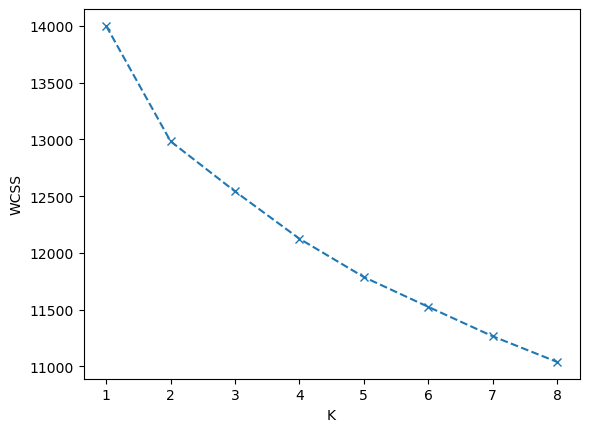

In [14]:
plt.figure()   # plotting, this is  known as elbow plot
plt.plot(clusters,wcss,"x--")  # ploting all the cluster wcss, x--- is representing the dots in plot 
plt.xlabel("K")   # x is labled as K
plt.ylabel("WCSS")   # y is labled as WCSS
plt.show() # to show plot 

In [15]:
model=KMeans(n_clusters=2) # here n_cluster should be range in 2 
model.fit(new_df) # fitting the values 

KMeans(n_clusters=2)

In [16]:
model.labels_   # it is showing that all the data the whether is person is dead or survived 0=dead and 1=survived this is basically used to find the labels of each data.

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [17]:
df.columns  # is used to show columns

Index(['Name', 'Age', 'Food Supply (Days)', 'Water per Day (Liters)',
       'First Aid Kits', 'Antibiotics', 'Painkillers', 'Weapons Available',
       'Defensive Structures', 'Training Level', 'Radios Available',
       'Access to Reliable Information', 'Support Groups Available',
       'Entertainment Available'],
      dtype='object')

In [18]:
df["survived"]=model.labels_    # created the new column named as survived and the values are numeric type

In [19]:
df.head()

,Name,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available,survived
0,1.088191,0.368688,-0.188753,0.991806,-0.358837,0.063933,-0.276900,-0.923058,-0.021865,-0.25014,0.786065,-0.970437,0.982159,-1.002002,0
1,-1.546655,-0.285159,-0.523421,0.078002,1.506868,1.052581,-1.153806,-0.610322,0.611915,0.33158,0.306270,-0.970437,0.982159,0.998002,0
2,1.088191,-0.693814,-0.077197,0.437030,-0.358837,0.558257,-0.141991,0.988107,0.928805,0.33158,0.146338,1.030464,-1.018165,-1.002002,1
3,-1.107514,1.185997,0.145915,1.608589,1.506868,0.723031,-1.018898,0.432132,-0.338756,-0.25014,0.945997,-0.970437,-1.018165,0.998002,0
4,0.209909,-0.939007,-1.304313,1.613363,-0.358837,0.887806,0.397643,1.439837,-1.606316,-0.25014,0.626133,1.030464,0.982159,-1.002002,1


In [20]:
df["survived"].value_counts()   #.value_counts use for counting values of each data 509 people are dead and 49 people survived

survived
0    515
1    485
Name: count, dtype: int64

In [21]:
features=df    #new variable assigned named as features
target=df.iloc[:,-1]  # target column is survived so we deleted the column for temporary by using iloc 

In [22]:
features.head()  #this helps to show the top  5 rows of data

,Name,Age,Food Supply (Days),Water per Day (Liters),First Aid Kits,Antibiotics,Painkillers,Weapons Available,Defensive Structures,Training Level,Radios Available,Access to Reliable Information,Support Groups Available,Entertainment Available,survived
0,1.088191,0.368688,-0.188753,0.991806,-0.358837,0.063933,-0.276900,-0.923058,-0.021865,-0.25014,0.786065,-0.970437,0.982159,-1.002002,0
1,-1.546655,-0.285159,-0.523421,0.078002,1.506868,1.052581,-1.153806,-0.610322,0.611915,0.33158,0.306270,-0.970437,0.982159,0.998002,0
2,1.088191,-0.693814,-0.077197,0.437030,-0.358837,0.558257,-0.141991,0.988107,0.928805,0.33158,0.146338,1.030464,-1.018165,-1.002002,1
3,-1.107514,1.185997,0.145915,1.608589,1.506868,0.723031,-1.018898,0.432132,-0.338756,-0.25014,0.945997,-0.970437,-1.018165,0.998002,0
4,0.209909,-0.939007,-1.304313,1.613363,-0.358837,0.887806,0.397643,1.439837,-1.606316,-0.25014,0.626133,1.030464,0.982159,-1.002002,1


In [23]:
target   # it is basically showing the target column

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    0
998    0
999    0
Name: survived, Length: 1000, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split   # imported train_test_split for traing our model which can give us more accuracy
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [25]:
from sklearn.linear_model import LogisticRegression    # imported logistic regression model to find accuracy
lr=LogisticRegression()                                # lr is variable for logisticrregression
lr.fit(xtrain,ytrain)                                  # here we fit xtrain and ytrain and tarined our model
ypred=lr.predict(xtest)                                # this will predict the accuracy of xtest

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report    # this model is used find accuracy,confusion matrix & gives classification report 
ac=accuracy_score(ytest,ypred)    # gives accuracy score on ytest and ypred after train data
cm=confusion_matrix(ytest,ypred)   # [[137   0][  0 163]] this table is provided by confusion matrix of ytest & ypred number of people dead & survived
cr=classification_report(ytest,ypred) # this gives all over classification report on data 

print(f"Accuarcy:{ac}\n{cm}\n{cr}")    # printing  accuracy_score, confusion_matrix,classification_report
#  accuracy of this model is 100% 

Accuarcy:1.0
[[161   0]
 [  0 139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       139

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [27]:
from sklearn.svm import SVC # imported support vector classification(svc) provide robust & accurate result
svm=SVC()  # svm is variable for svc()
svm.fit(xtrain,ytrain)   # fit xtrain & ytrain 
ypred=svm.predict(xtest) # predicted xtest

In [28]:
ac=accuracy_score(ytest,ypred)   # accuracy score of ytest & ypred 
cm=confusion_matrix(ytest,ypred)  # provides tabel of data
cr=classification_report(ytest,ypred)   # provides classification report

print(f"Accuarcy:{ac}\n{cm}\n{cr}") # printing accuarcy
# accuracy of this model is 100%

Accuarcy:1.0
[[161   0]
 [  0 139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       139

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [29]:
from sklearn.preprocessing import StandardScaler  # imported standardscalerit it ensure that each data features contributes equall to the models performance leading to more reliable and efficent learning
ss=StandardScaler()   # ss is variable of standardscaler
xtrain_s=ss.fit_transform(xtrain)  # here we fit &transform our xtrain data.
xtest_s=ss.transform(xtest) # transformed xtest data

In [30]:
svm=SVC()    # ss is variable of SVC() 
svm.fit(xtrain_s,ytrain)   #xtrain_s is fit&transform value of xtrain 
ypred=svm.predict(xtest_s)  # predicting xtest_s

In [31]:
ac=accuracy_score(ytest,ypred) # accuracy score of ytest & ypred
cm=confusion_matrix(ytest,ypred)  # tabel is same as before 
cr=classification_report(ytest,ypred) # all over classification report of model

print(f"Accuarcy:{ac}\n{cm}\n{cr}")  # printing accuracy , confusion matrix & classification report
# by using this model we get accuracy of 100%

Accuarcy:1.0
[[161   0]
 [  0 139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       139

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [32]:
from sklearn.ensemble import RandomForestClassifier  # imported random forest classifier it is bunch of dicision tree
model=RandomForestClassifier()   # model is variable
model.fit(xtrain,ytrain) # fitting xtrain,ytrain 
ypred=model.predict(xtest)   # predicting xtest
ac=accuracy_score(ytest,ypred)  # accuracy of ytest and ypred
cm=confusion_matrix(ytest,ypred) # confusion matrix table of data
cr=classification_report(ytest,ypred) # classification report on ytest & ypred

print(f"Accuarcy:{ac}\n{cm}\n{cr}") # printing accuracy , confusion matrix & classification report
# by also using randomforestclassifier we get accuracy of 100% 

Accuarcy:1.0
[[161   0]
 [  0 139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       139

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<Axes: xlabel='survived', ylabel='count'>

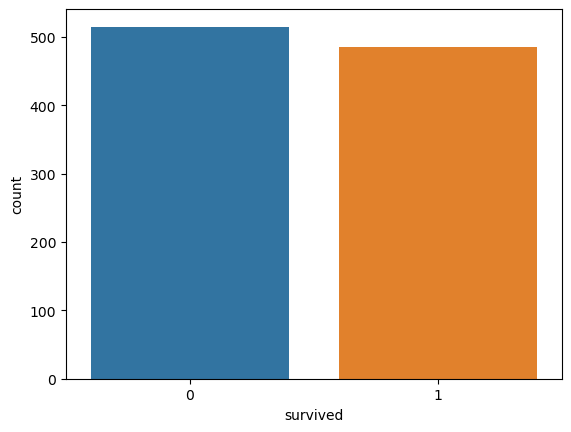

In [33]:
sns.countplot(data=df, x="survived")   # we have ploted graph by using countplot either the person survived or dead 
                                    # we can see in this graph that both survived and dead graph are nearly same.

In [34]:
 '''CONCLUSION:- After converting data from unsupervised to supervised we used 4 models for accuracy and got 100% accuracy by each model.
                 There is very low diffrence between survived and dead people this we can understand by visualization of countplot'''

'CONCLUSION:- After converting data from unsupervised to supervised we used 4 models for accuracy and got 100% accuracy by each model.\n                There is very low diffrence between survived and dead people this we can understand by visualization of countplot'